## Vision por computadora 1 - FIUBA
## 17Co2024
## Autores: Joaquín Matías Mestanza, Gonzalo Nicolas Silva Caggiano, Ramiro Andrés Feichubuinm


Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template.


### 1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos.

In [80]:
import matplotlib.pyplot as plt
import cv2
import os
template_path = 'template/pattern.png'
template_color = cv2.cvtColor(cv2.imread(template_path), cv2.COLOR_BGR2RGB)

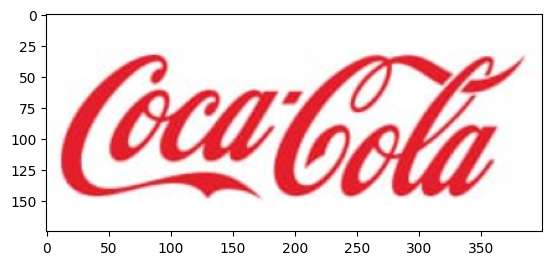

In [70]:
plt.imshow(template_color)

Inspeccionamos las imágenes con las que vamos a testear

In [72]:
test_images = os.listdir('images')
test_images

['COCA-COLA-LOGO.jpg',
 'coca_multi.png',
 'coca_logo_1.png',
 'coca_retro_1.png',
 'logo_1.png',
 'coca_logo_2.png',
 'coca_retro_2.png']

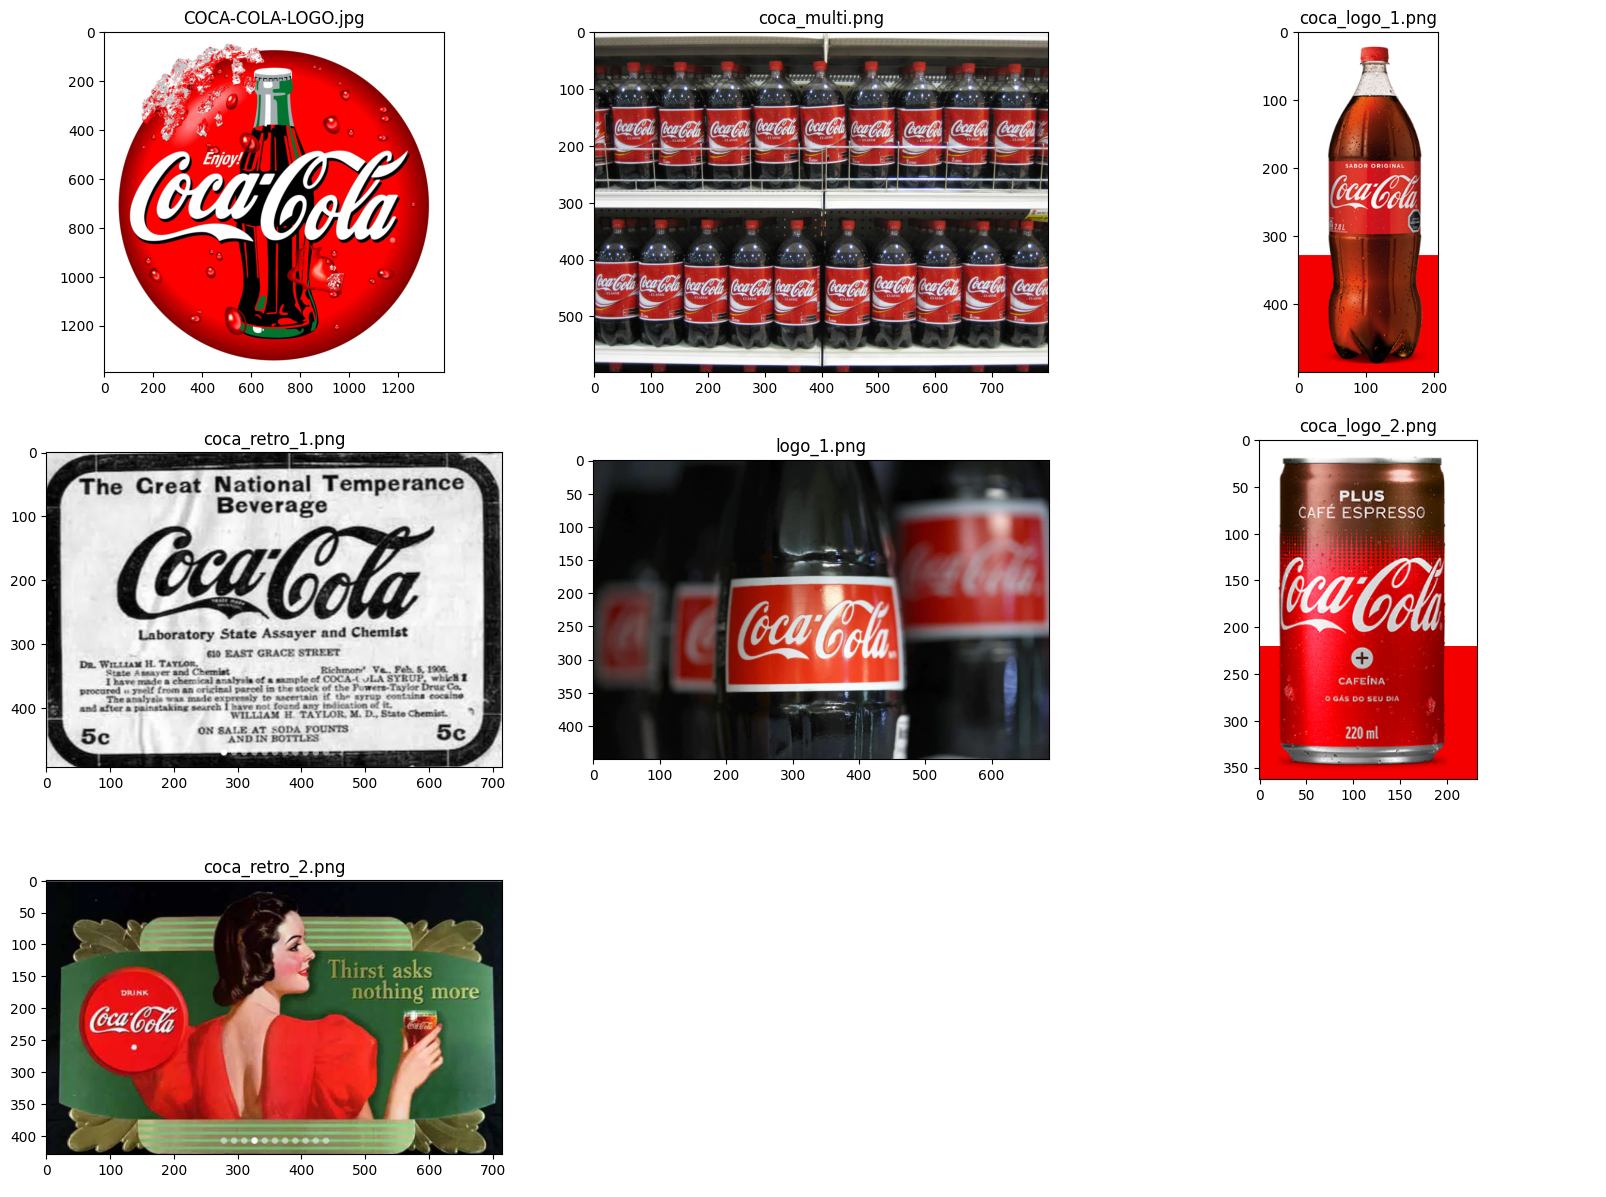

In [78]:
test_images_color = [cv2.cvtColor(cv.imread(f'images/{im}'), cv2.COLOR_BGR2RGB) for im in test_images]

def plot_images(img_list, cols=3):
    rows = len(img_list)//cols + 1
    f, axes = plt.subplots(rows,cols, figsize=(20,15)) 
    axes = axes.flatten()
    
    for i,ax in enumerate(axes):
        if i < len(img_list):
            ax.imshow(test_images_color[i])
            ax.set_title(test_images[i])
        else:
            ax.axis('off')

plot_images(test_images_color)

Vemos que en primera instancia el logo esta en diferentes escalas y además hay una imagen que involucra muchas etiquetas (góndola).
Esto nos da un indicio a utilizar algoritmos que no sean sensibles a la escala como podría ser SIFT y además no se puede utilizar el mínimo/máximo de las detecciones, hay que utilizar un threshold.

#### 1.1 Análisis del template

El procesamiento de las imágenes se realizará en escala de grises, ya que estamos tratando de detectar la marca el color no nos proporciona un dato útil.

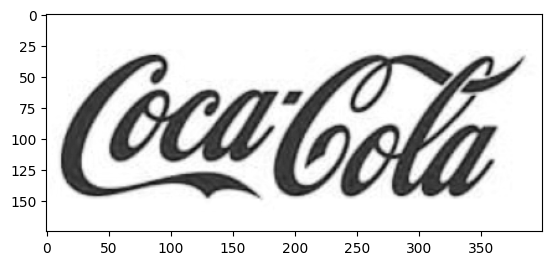

In [85]:
template_gray = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
plt.imshow(template_gray, cmap='gray')

Una información más util en el logo podría ser sus bordes, con lo cual podemos implementar un detector de bordes de Canny

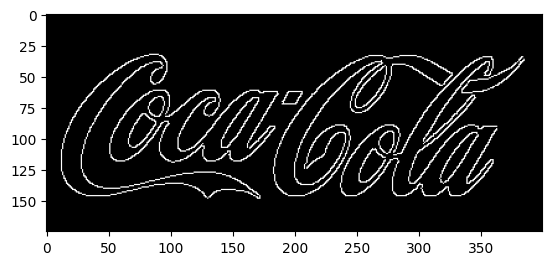

In [88]:
template_gray_canny = cv.Canny(template_gray, 100,200)
plt.imshow(template_gray_canny, cmap='gray')

Inclusive podemos reducir las dimensiones de la imagen para mejorar la detección y no introducir espacios en blanco innecesarios

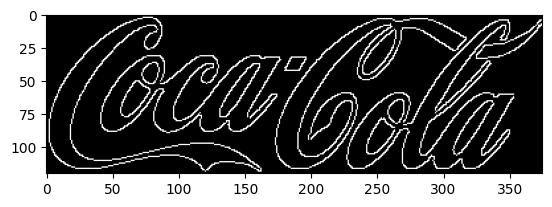

In [92]:
template_canny_reduced = template_canny[30:-25, 10:-15]
# quiza se puede reducir aun mas pero es la primera iteracion
plt.imshow(template_canny_reduced, cmap='gray')